In [96]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory 
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import numpy as np

In [97]:
directory='flowers'

In [98]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory,image_size=(256,256),validation_split=0.2,subset='training',seed=544)
val_data=tf.keras.preprocessing.image_dataset_from_directory(directory,image_size=(256,256),validation_split=0.2,subset='validation',seed=544)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [99]:
class_names = train_data.class_names
print(class_names)


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


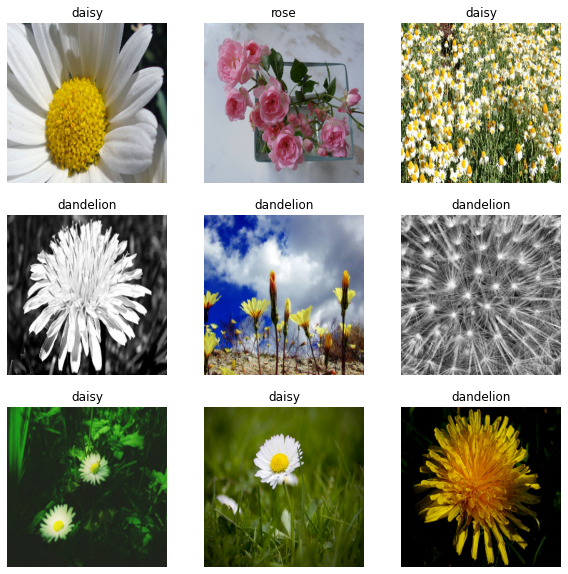

In [100]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [101]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 256, 256, 3)
(32,)


In [102]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)


In [103]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
tf.keras.layers.RandomZoom(0.3)
])


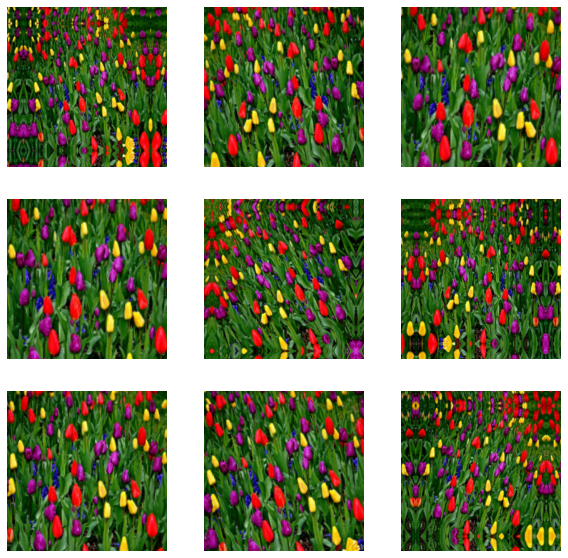

In [104]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [105]:
num_classes = 5

model = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256, 256, 3)),
data_augmentation,
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(32, 3, activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),   
tf.keras.layers.Dense(num_classes)
])

callbacks=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 sequential_21 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                

In [106]:
model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [107]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[callbacks,red_lr]
)


Epoch 1/30
108/108 [==============================] - 9s 76ms/step - loss: 1.2626 - accuracy: 0.4621 - val_loss: 1.0684 - val_accuracy: 0.5574 - lr: 0.0010
Epoch 2/30
108/108 [==============================] - 8s 71ms/step - loss: 1.0361 - accuracy: 0.5970 - val_loss: 0.9651 - val_accuracy: 0.6188 - lr: 0.0010
Epoch 3/30
108/108 [==============================] - 8s 70ms/step - loss: 0.9543 - accuracy: 0.6364 - val_loss: 0.9228 - val_accuracy: 0.6454 - lr: 0.0010
Epoch 4/30
108/108 [==============================] - 8s 70ms/step - loss: 0.8983 - accuracy: 0.6477 - val_loss: 0.8695 - val_accuracy: 0.6582 - lr: 0.0010
Epoch 5/30
108/108 [==============================] - 8s 71ms/step - loss: 0.8535 - accuracy: 0.6778 - val_loss: 0.8752 - val_accuracy: 0.6559 - lr: 0.0010
Epoch 6/30
108/108 [==============================] - 8s 73ms/step - loss: 0.8344 - accuracy: 0.6795 - val_loss: 0.8578 - val_accuracy: 0.6501 - lr: 0.0010
Epoch 7/30
108/108 [==============================] - 8s 72ms/st